In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# Sentiment Prediction on Movie reviews
## Predict sentiment of a movie review.

**Description:**<br>
In this dataset each record represents a movie-review pair with movie title, description, genres, duration, director, actors, users' ratings, review text, reviewer name, etc. My task is to build an ML model to predict sentiment of the review text.<br>

**Evaluation:**<br>
For Evaluation F1 score micro is used for this competition

### **Lets Setup**
Essential library imported for ploting

In [2]:
import math
import ast

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
%matplotlib inline

# Suppress warning
import warnings
warnings.filterwarnings("ignore")

# Enable code autocompletion
%config Completer.use_jedi = False

### **Reading data**
Reading movie, test and train data

In [3]:
# Loading movies, test and train data
movies = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
train =  pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

In [4]:
print("Shape of movies : ", movies.shape)
print("Shape of train : ", train.shape)
print("Shape of test : ", test.shape)

Shape of movies :  (143258, 14)
Shape of train :  (162758, 5)
Shape of test :  (55315, 4)


In [5]:
train.head(2)

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE


In [6]:
movies.head(2)

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN


In [7]:
movies.movieid.value_counts()

escape_the_terminator_tyler_durden_astonish         367
silent_mystery_the_terminator                        17
crimson_james_t._kirk_marty_mcfly_hulk               17
darth_vader_dazzling_courageous_holly_golightly      16
rocky_balboa_wonder_woman_majestic_emerald           16
                                                   ... 
anakin_skywalker_frodo_baggins_t-800_black_widow      1
phantom_hannibal_lecter_don_vito_corleone_pirate      1
v_bruce_wayne_stardust                                1
mystery_lara_croft_tony_montana                       1
wonder_hermione_granger_hulk_v                        1
Name: movieid, Length: 126404, dtype: int64

In [8]:
movies[movies.movieid == "escape_the_terminator_tyler_durden_astonish"].head(8)

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
871,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
1126,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
4038,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,2022-04-29,NaN,140.0,Drama,French (France),Stephanie Russell,NaN,Utopia,NaN
5048,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
7364,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
8991,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
10093,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
11249,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN


movies data set has multiple rows with same movieid but other columns are different dropping duplicate result in loosing data.

### **Now Merging Data**
Merging train data with with movies data on movieid, And same for test data
* Duplicates from movies data are removed by agrigating other columns other than movie id
* Train data is mereged with movies data on movieid
* Test data is mereged with movies data on movieid

**Formating Data**<br>
Movie Data has some inconsistent

* 'releaseDateStreaming' and 'releaseDateTheaters' is in string (in format 12/10/2021 changed in 2021)
* 'boxOffice' collection in string ('$125M' is changed into 12500000.0)
* 'ratingContents' in bad format (list as string)

In [9]:
def format_movies(movies):
    copy_movies = movies.copy()
    
    date_cols = ['releaseDateStreaming','releaseDateTheaters']

    # this function ignore null values and return as it is and change not null cell date to year
    def date_to_year(date):
        if pd.isna(date):
            return np.nan
        else:
            return date[:4]

    # rating content is in format str(["action","ramance"]) is changed into str("action","romance")
    def strip(x):
      if pd.isna(x):
        return np.nan
      else:
        return (x[1:-1])
    
    # changing string to a numerical value.
    def box_collection(x):
      if type(x) == str:
        if x[-1] == "M":
          return float(x[1:-1]) * 1000000
        elif x[-1] == "K":
          return float(x[1:-1]) * 1000
      elif math.isnan(x):
        return np.nan
    
    # tranforming data.
    copy_movies.ratingContents  = copy_movies.ratingContents.map(strip)
    copy_movies.boxOffice = copy_movies.boxOffice.map(box_collection)

    for col in date_cols:
        copy_movies[col] = copy_movies[col].map(date_to_year)
    
    return copy_movies

formated_movies = format_movies(movies)

**Remove Duplicate from Movies data**

In [10]:
# function to calculate the mean, of aggregated numerical values,after ingnoring null values
def mean_ignore_nan(x):
    return np.mean(x.dropna())

# it will collect all unique values and if there is str("action , romance")  it chnage into two values and aggregate all with same 
# movieid and ingnore nan and take unique and make set out of it
def unique_ignore_nan(x):
    if not pd.isna(x).all():
        unique_values = set()
        for val in x.dropna():
            unique_values.update(val.strip().split(","))
        return unique_values
    else:
        return np.nan

# define the aggregation functions for each column
aggregation_functions = {
    'title': 'first',
    'audienceScore': mean_ignore_nan,
    'rating': unique_ignore_nan,
    'ratingContents': unique_ignore_nan,
    'releaseDateTheaters': unique_ignore_nan,
    'releaseDateStreaming': unique_ignore_nan,
    'runtimeMinutes': mean_ignore_nan,
    'genre': unique_ignore_nan,
    'originalLanguage': unique_ignore_nan,
    'director': unique_ignore_nan,
    'boxOffice': mean_ignore_nan,
    'distributor': unique_ignore_nan,
    'soundType': unique_ignore_nan
}

# grouped by movieid and agg. with above function
no_duplicate_movies = formated_movies.groupby('movieid').agg(aggregation_functions).reset_index()



Now Merging movie data with train and test

In [11]:
def merge_data(train,test,movies):
    #copy train and test
    new_train = train.copy()
    new_test = test.copy()
    new_movies = movies.copy()
    
    # now merging train and test data with movies data
    new_train = pd.merge(new_movies,train,how="right",on="movieid")
    new_test = pd.merge(new_movies,test,how="right",on="movieid")
    
    # check the number of rows same after merger
    assert new_test.shape[0] == test.shape[0]
    assert new_train.shape[0] == train.shape[0]
    return (new_train,new_test)

merge_train, merge_test  = merge_data(train,test,no_duplicate_movies)

In both train and test data has movieid and title these are indexes and are not usefull

In [12]:
# Remove movieid and title from train and test 
def remove_index():
    train = merge_train.copy()
    test = merge_test.copy()
    
    train = train.drop(['movieid','title'],axis=1)
    test = test.drop(['movieid','title'],axis=1)
    
    # check the number of rows are same after droping inidex
    assert train.shape[0] == merge_train.shape[0]
    assert test.shape[0] == merge_test.shape[0]
    return (train,test)

new_train, new_test = remove_index()

In [13]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   audienceScore         159922 non-null  float64
 1   rating                118171 non-null  object 
 2   ratingContents        118171 non-null  object 
 3   releaseDateTheaters   146403 non-null  object 
 4   releaseDateStreaming  157353 non-null  object 
 5   runtimeMinutes        162016 non-null  float64
 6   genre                 162237 non-null  object 
 7   originalLanguage      162032 non-null  object 
 8   director              162758 non-null  object 
 9   boxOffice             130313 non-null  float64
 10  distributor           142269 non-null  object 
 11  soundType             93466 non-null   object 
 12  reviewerName          162758 non-null  object 
 13  isFrequentReviewer    162758 non-null  bool   
 14  reviewText            156311 non-null  object 
 15  

*  162758 rows
* 17 columns (16 features and 1 label {"sentiment"})

In [14]:
def merge_dates(new_train,new_test):
    # date cols
    date_cols = ['releaseDateTheaters','releaseDateStreaming']
    
    # copy data.
    train = new_train.copy()
    test = new_test.copy()
    
    # to take mean of years
    def mean_year(years):
        if type(years) == set:
            list = []
            for _ in years:
                list.append(int(_))
            return [int(np.mean(list))]
        else:
            return [np.nan]
    
    # tranforming train and test data.
    for col in date_cols:
        train[col] = train[col].map(mean_year)
        test[col] = test[col].map(mean_year)
    
    # combining both both date column to on column.
    test['releaseDate'] = test['releaseDateTheaters'] + test['releaseDateStreaming']
    train['releaseDate'] = train['releaseDateTheaters'] + train['releaseDateStreaming']
    
    # column is a list of string of years. 
    # leaving nan as nan
    # taking mean of list of year.
    def process_release_date(date_list):
        if not all(pd.isna(date_list)):
            if pd.isna(date_list[0]):
                return date_list[1]
            elif pd.isna(date_list[1]):
                return date_list[0]
            else:
                return int(np.mean(date_list))
        elif all(pd.isna(date_list)):
            return np.nan

    # appling transformation.
    train['releaseDate'] = train['releaseDate'].apply(process_release_date)
    test['releaseDate'] = test['releaseDate'].apply(process_release_date)
    
    # droping both initial date columns from train and test data.
    train = train.drop(['releaseDateTheaters','releaseDateStreaming'],axis=1)
    test = test.drop(['releaseDateTheaters','releaseDateStreaming'], axis=1)
    
    # checking no. of rows are same after transformation.
    assert train.shape[0] == new_train.shape[0]
    assert test.shape[0] == new_test.shape[0]
    return train,test

final_train, final_test = merge_dates(new_train,new_test)

In [15]:
final_train.head(2)

,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,reviewerName,isFrequentReviewer,reviewText,sentiment,releaseDate
0,65.0,{PG-13},"{ 'Substance Use', 'Some Thematic Material', ...",105.0,"{ Adventure, Animation, Comedy, Fantasy}",{English},{Bennie Basso},NaN,{Netflix},NaN,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,2022.0
1,47.0,{PG-13},"{ 'Brief Partial Nudity', 'Some Sexual Material'}",105.0,"{ Comedy, Action, Holiday, Romance, Lgbtq+}",{English},"{Alma White, Hubert Dixon}",110500000.0,{Warner Bros.},"{ DTS, Dolby Digital}",Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,2010.0


### **Checking Null values in data**
* Percentage of null values in train

In [16]:
def null_check(updated_train):
    train_nc = updated_train.copy()
    col_names = train_nc.columns
    
    train_null_dict = {}
    i = 1
    
    for col_name in col_names:
        train_null_dict[i] = (col_name ,float("{:.1f}".format((train_nc[col_name].isna().sum() / train_nc.shape[0])* 100)))
        i = i + 1
    
    train_null = pd.DataFrame(train_null_dict).T
    
    train_null.rename(columns = {0:'Column Name', 1:'Percentage',}, inplace = True)
    
    print("-----------------------Null Values % in  Data-------------------------------\n")
    print(train_null[train_null['Percentage'] > 0])
#     print(train_null)
    return ""

null_check(final_train)

-----------------------Null Values % in  Data-------------------------------

         Column Name Percentage
1      audienceScore        1.7
2             rating       27.4
3     ratingContents       27.4
4     runtimeMinutes        0.5
5              genre        0.3
6   originalLanguage        0.4
8          boxOffice       19.9
9        distributor       12.6
10         soundType       42.6
13        reviewText        4.0
15       releaseDate        1.3


''

In [17]:
null_check(final_test)

-----------------------Null Values % in  Data-------------------------------

         Column Name Percentage
1      audienceScore        2.6
2             rating       33.2
3     ratingContents       33.2
4     runtimeMinutes        0.7
5              genre        0.5
6   originalLanguage        0.7
8          boxOffice       24.7
9        distributor       16.6
10         soundType       46.0
13        reviewText        4.5
14       releaseDate        2.1


''

***columns has more than 25 % of data missing, So we are removing those from both train and test***<br>

|   Column Names   |   % in train   |   % in test   |
| ---------------- | -------------- | ------------- |
|      rating      |       27.4     |      33.2     |
|  ratingContents  |       27.4     |      33.2     |
|     soundType    |       42.6     |      46.0     |

In [18]:
def droping_high_perc_null_col(updated_train,updated_test,to_dlt):
    train_copy = updated_train.copy()
    test_copy = updated_test.copy()
    col_to_dlt = to_dlt
    return (train_copy.drop(col_to_dlt,axis=1),test_copy.drop(col_to_dlt,axis=1))

train_after_drop, test_after_drop = droping_high_perc_null_col(final_train,final_test,to_dlt=["rating", "ratingContents", "soundType"])


some essential changes in data before data exploration
* test data has isFrequentReviewer column name as isTopCritic we need to change that
* change datatype of release date and isFrequentReviewer to String

In [19]:
def date_int_to_str(date):
    if pd.isna(date):
        return np.nan
    else:
        return str(int(date))
    
train_after_drop.releaseDate = train_after_drop.releaseDate.map(date_int_to_str)
test_after_drop.releaseDate = test_after_drop.releaseDate.map(date_int_to_str)


# these are few updates here test data has isFrequentReviewer column name as isTopCritic we need to change that
# and for data exploration we are going to change datatype of this column as string
test_after_drop.rename(columns = {'isTopCritic':'isFrequentReviewer'}, inplace = True)
train_after_drop.isFrequentReviewer = train_after_drop.isFrequentReviewer.astype(str)
test_after_drop.isFrequentReviewer = test_after_drop.isFrequentReviewer.astype(str)

### **Spliting Train Data**
Into Feature Matrix X and Target Label y

In [20]:
X = train_after_drop.drop("sentiment",axis=1)
y = train_after_drop["sentiment"].copy()
assert X.shape[0] == y.shape[0]

## **Data Exploration**


In [21]:
X_ = X.copy()
y_ = y.copy()

### **Label**
'sentiment' It is binary categorical data has "POSITIVE" and "NEGATIVE"

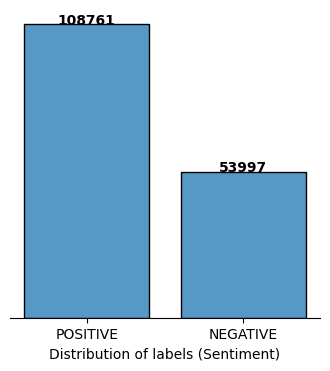

In [22]:
plt.figure(figsize = (4,4))
ax = sns.histplot(data = y_, shrink=0.8)
sns.despine(left=True)

label_counts = [{"label": "POSITIVE" ,"count": y_.value_counts()["POSITIVE"]},
                {"label": "NEGATIVE" ,"count": y_.value_counts()["NEGATIVE"]}]

for label_count in label_counts:
    ax.annotate(f'{label_count["count"]}', xy=(label_count["label"], label_count["count"]),ha='center',
                fontsize=10, color="black", fontweight='bold')


plt.xlabel('Distribution of labels (Sentiment)')

ax.yaxis.set_visible(False)

plt.show()

In [23]:
positive_sentiment = ((y_ == 'POSITIVE').sum()/y_.shape[0])*100
negative_sentiment = ((y_ == 'NEGATIVE').sum()/y_.shape[0])*100

print('Percentage of +ve sentiment: ', round(positive_sentiment,2))
print('Percentage of -ve sentiment: ', round(negative_sentiment,2))

Percentage of +ve sentiment:  66.82
Percentage of -ve sentiment:  33.18


* 66.8% has positive sentiment and 33.2% has negative sentiment.
* *There is **inbalance** in the dataset*

In [24]:
X_.dtypes.value_counts()

object     8
float64    3
dtype: int64

In [25]:
cat_cols = X_.select_dtypes(include = "object").columns.to_list()
num_cols = X_.select_dtypes(include = "float64").columns.to_list()

print('Numerical Columns : ',num_cols)
print('Categorical Columns : ',cat_cols)

Numerical Columns :  ['audienceScore', 'runtimeMinutes', 'boxOffice']
Categorical Columns :  ['genre', 'originalLanguage', 'director', 'distributor', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'releaseDate']


###  Categorical Columns
**column names:** 'genre', 'originalLanguage', 'director', 'distributor', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'releaseDate'

In [26]:
cols_with_sets = ['genre', 'originalLanguage','director','distributor']

def unique_values_set_cols(col):
    selected_col = X_[col].copy()
    selected_col.dropna(inplace=True)
    element_counts = Counter()
    for s in selected_col:
        element_counts.update(s)
    df = pd.DataFrame.from_dict(element_counts, orient='index', columns=['Count'])

    # Step 1: Convert category names to lowercase and remove leading  spaces
    df.index = df.index.str.lower().str.strip()

    # Step 2: Group by category names and sum the counts
    grouped_df = df.groupby(df.index).sum()

    # Step 3: Convert the DataFrame back to a dictionary
    combined_counts = grouped_df.to_dict()['Count']
    
    # Calculate the total count
    total_count = sum(combined_counts.values())

    # Step 4: Add a new column for the percentage count
    grouped_df['Percentage'] = round((grouped_df['Count'] / total_count) * 100)
    
    return grouped_df.sort_values(by='Count', ascending=False)



def show_stats(df,name,show_all_unique):
    print("----------------- ", name ," stat. ------------------------\n")
    print("Number of unique values ",df.count()[0], "\n")
    print("Top 5 occurring "+ name)
    print(df.head(5))
    if show_all_unique:
        print("\n")
        print("All unique values in " + name)
        print(df.index)

*Genre Column*

In [27]:
genre_unique = unique_values_set_cols('genre')
show_stats(genre_unique,"genre",show_all_unique = False)
# show_stats(genre_unique,"genre",show_all_unique = True)

-----------------  genre  stat. ------------------------

Number of unique values  34 

Top 5 occurring genre
                    Count  Percentage
drama               97868        22.0
comedy              60306        14.0
mystery & thriller  45225        10.0
action              32115         7.0
adventure           27283         6.0


*originalLanguage Columns*

In [28]:
language_unique = unique_values_set_cols('originalLanguage')
show_stats(language_unique,"genre",show_all_unique = False)
# show_stats(language_unique,"genre",show_all_unique = True)

-----------------  genre  stat. ------------------------

Number of unique values  96 

Top 5 occurring genre
                           Count  Percentage
english                   143838        70.0
french (france)             6037         3.0
english (united kingdom)    5838         3.0
french (canada)             4722         2.0
spanish                     4283         2.0


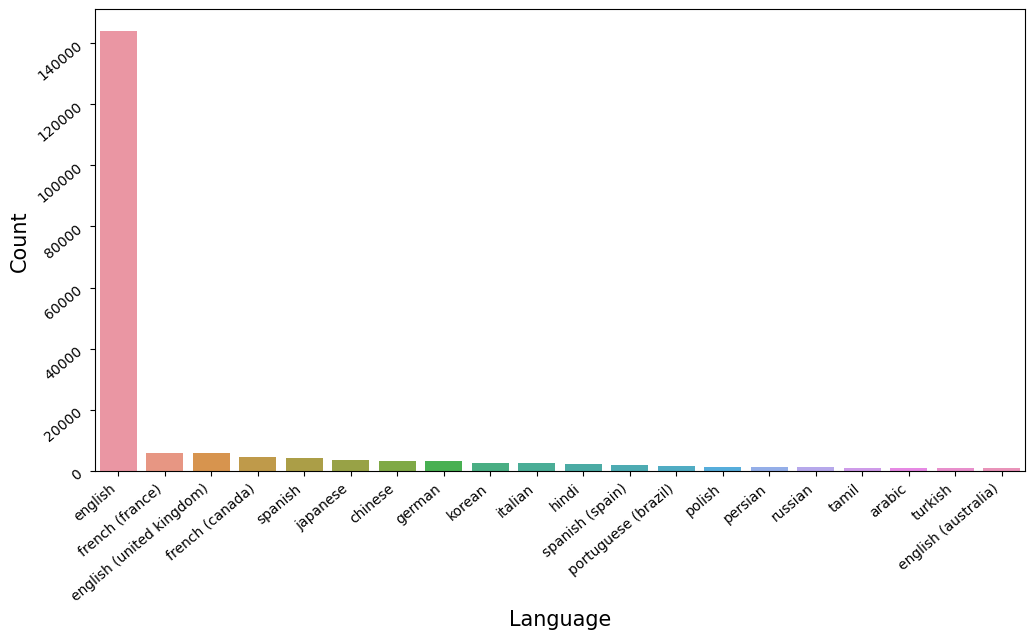

In [29]:
language_unique_ = language_unique.copy()
language_unique_ = language_unique_.reset_index()

language_unique_.columns = ['movieLanguage','movieCount','Percentage']


plt.figure(figsize = (12,6))
ax = sns.barplot(x='movieLanguage' ,y='movieCount' ,data=language_unique_[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right", fontsize=10)
plt.xlabel('Language',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

*director column*

In [30]:
director_unique = unique_values_set_cols('director')
show_stats(director_unique,"genre",show_all_unique = False)
# show_stats(director_unique,"genre",show_all_unique = True)

-----------------  genre  stat. ------------------------

Number of unique values  13038 

Top 5 occurring genre
                   Count  Percentage
joseph brooks       2800         1.0
augusta daniel      1472         0.0
edna wheeler         986         0.0
billy diaz           861         0.0
stephanie russell    798         0.0


*distributor column*

In [31]:
distributor_unique = unique_values_set_cols('distributor')
show_stats(distributor_unique,"genre",show_all_unique = False)
# show_stats(director_unique,"genre",show_all_unique = True)

-----------------  genre  stat. ------------------------

Number of unique values  1314 

Top 5 occurring genre
                             Count  Percentage
universal pictures           10246         6.0
warner bros. pictures         9970         5.0
paramount pictures            9774         5.0
20th century fox              8270         4.0
sony pictures entertainment   6965         4.0


*isFrequentReviewer column*

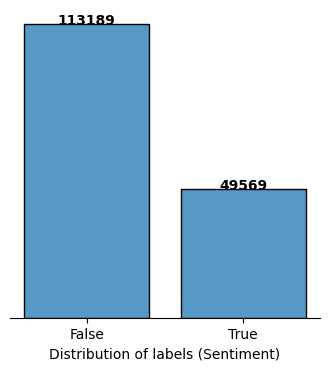

In [32]:
plt.figure(figsize = (4,4))
ax = sns.histplot(data = X_['isFrequentReviewer'], shrink=0.8)
sns.despine(left=True)

label_counts = [{"label": "True" ,"count": X_['isFrequentReviewer'].value_counts()["True"]},
                {"label": "False" ,"count": X_['isFrequentReviewer'].value_counts()["False"]}]

for label_count in label_counts:
    ax.annotate(f'{label_count["count"]}', xy=(label_count["label"], label_count["count"]),ha='center',
                fontsize=10, color="black", fontweight='bold')


plt.xlabel('Distribution of labels (Sentiment)')

ax.yaxis.set_visible(False)

plt.show()

**Date Columns**<br>
'releaseDateStreaming' and 'releaseDateTheaters' are column with Years

In [33]:
# ranges of year of release of movies in stream and theaters
data = new_train.copy()

date_cols = ['releaseDateStreaming','releaseDateTheaters']

def set_to_string(x):
    if pd.isna(x):
        return np.nan
    else:
        return str(round(sum(int(num) for num in x)/len(x)))

for col in date_cols:
    data[col] = data[col].map(set_to_string)

for col in date_cols:
    start = 1910
    dict={'Range_of_years':[],'Number_of_Movies_release':[]}
    while start < 2023:
        to = start + 10
        index = str(start) + " to " + str(to)
        if (data[(data['releaseDateStreaming'] > str(start)) & (data[col] < str(to))][col].count()) > 0:
            dict['Range_of_years'].append(index)
            dict['Number_of_Movies_release'].append(str(data[(data[col] > str(start)) & (data[col] < str(to))][col].count()))
        start = to
    table_name = str(col + " ranges")
    title = table_name
    table_name = pd.DataFrame(dict)
    print("-------------- " + title + " ---------------\n")
    print(table_name)
    print("\n\n\n")

-------------- releaseDateStreaming ranges ---------------

  Range_of_years Number_of_Movies_release
0   1920 to 1930                        4
1   1980 to 1990                        5
2   1990 to 2000                     1630
3   2000 to 2010                    50177
4   2010 to 2020                    77464
5   2020 to 2030                    11537




-------------- releaseDateTheaters ranges ---------------

   Range_of_years Number_of_Movies_release
0    1910 to 1920                       16
1    1920 to 1930                      134
2    1930 to 1940                      471
3    1940 to 1950                      727
4    1950 to 1960                      909
5    1960 to 1970                     1642
6    1970 to 1980                     3892
7    1980 to 1990                     4335
8    1990 to 2000                     9147
9    2000 to 2010                    40561
10   2010 to 2020                    57715
11   2020 to 2030                    12596






* Null Values in releaseDateStreaming 3
* Null Values in releaseDateTheaters 10.0<br>
  **Both columns has many null values, Lets combine the both columns**
  *now null values in 1.3 after combining*

In [34]:
count = data.shape[0]
common_release_year_list = []
release_year_list_dif = []
for i in range(count):
    in_theater = data.releaseDateTheaters.iloc[i]
    in_stream = data.releaseDateStreaming.iloc[i]
    if type(in_theater) ==  type(in_stream):
        if type(in_theater) == type('str'):
            common_release_year_list.append(max(in_theater,in_stream))
            release_year_list_dif.append(abs(int(in_theater) - int(in_stream)))
        else:
            common_release_year_list.append(max(in_theater,in_stream))
    elif type(in_theater) !=  type(in_stream):
        if type(in_theater) == type('str'):
            common_release_year_list.append(in_theater)
        elif type(in_stream) == type(np.nan) :
            common_release_year_list.append(in_stream)
release_date=pd.DataFrame(common_release_year_list)

In [35]:
print("Null Values in releaseDateStreaming", float("{:.1f}".format((data.releaseDateStreaming.isna().sum() / data.shape[0])* 100)))
print("Null Values in releaseDateTheaters", float("{:.1f}".format((data.releaseDateTheaters.isna().sum() / data.shape[0])*100)))
print("Null Values after combining", float("{:.1f}".format((release_date.isna().sum().iloc[0] / data.shape[0])*100)))

Null Values in releaseDateStreaming 3.3
Null Values in releaseDateTheaters 10.0
Null Values after combining 1.3


By combining both columns null values will be reduced to 1.3<br>
Difference between release in theater and streaming are bellow

### Numerical Column
**column name:** *audienceScore, runtimeMinutes, boxOffice*

In [36]:
X[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
audienceScore,159922.0,6.491057e+01,1.845317e+01,0.0,51.0,67.0,8.000000e+01,100.0
runtimeMinutes,162016.0,1.066909e+02,2.013975e+01,4.0,94.0,103.0,1.163333e+02,561.0
boxOffice,130313.0,4.870322e+07,8.722168e+07,1000.0,1000000.0,14900000.0,5.630000e+07,858400000.0


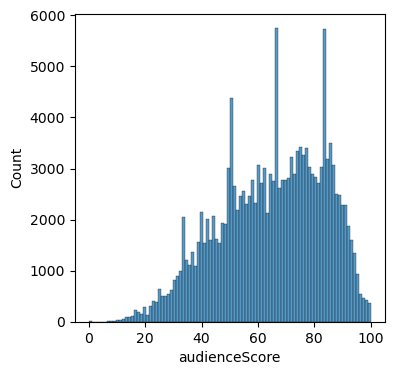

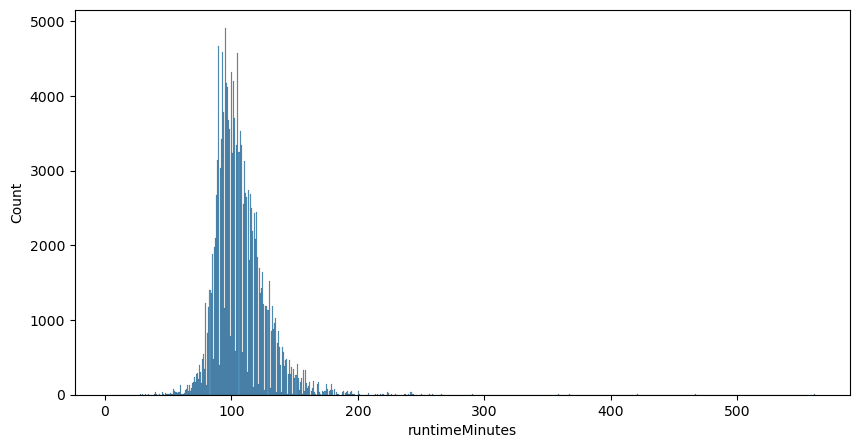

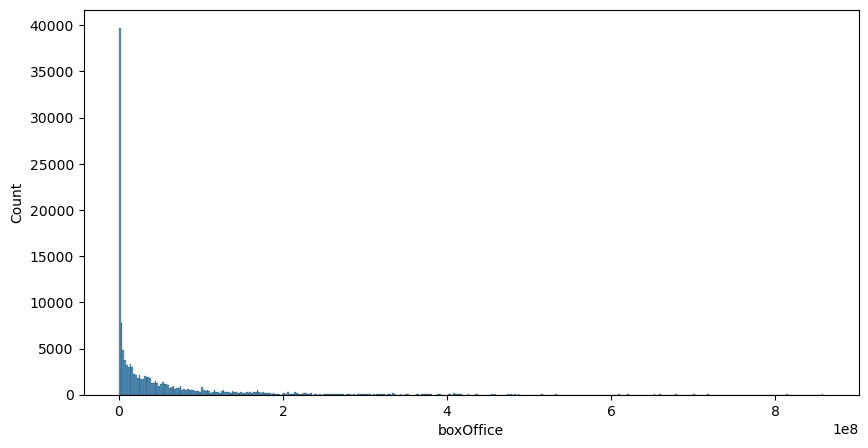

In [37]:
plt.figure(figsize=(4,4))
for col_name in num_cols:
    sns.histplot(data = X[col_name])
    plt.show()


In [38]:
train_data_sentimet_trans = train_after_drop.copy()
train_data_sentimet_trans['sentiment'] = train_data_sentimet_trans['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

<Axes: >

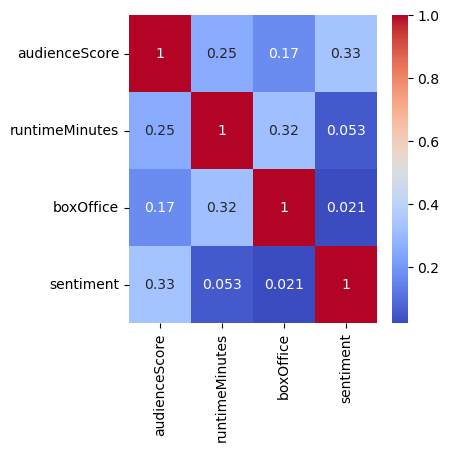

In [39]:
plt.figure(figsize=(4,4))

num_cols_with_label = num_cols  + ['sentiment']
sns.heatmap(train_data_sentimet_trans[num_cols_with_label].corr(),cmap="coolwarm", annot=True)
# num_cols_with_label

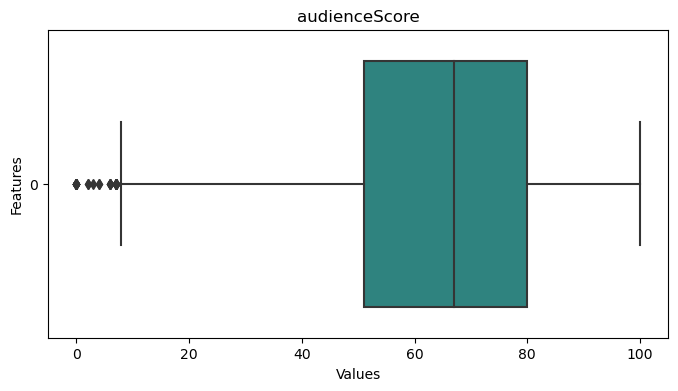

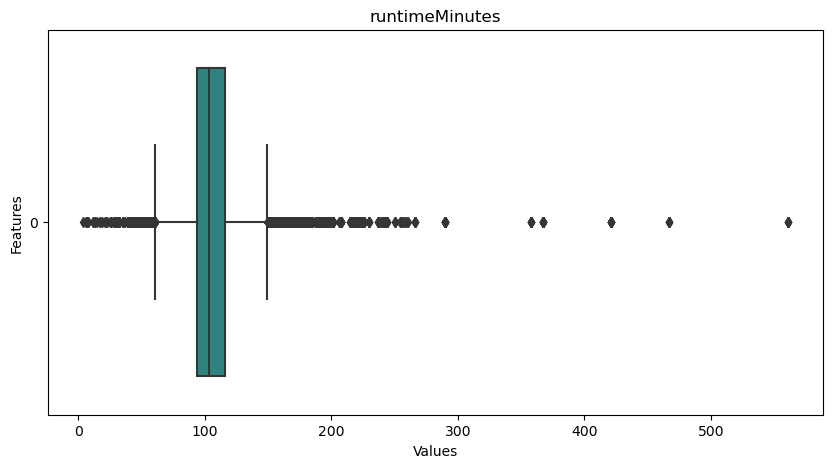

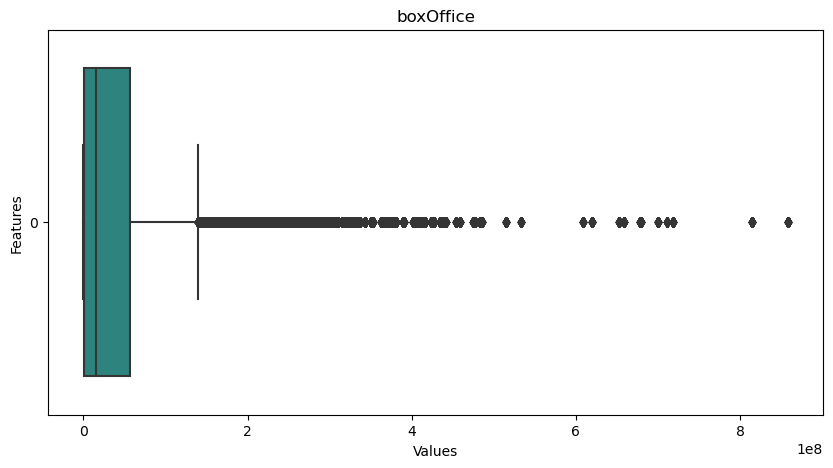

In [40]:
plt.figure(figsize=(8, 4))
for col in num_cols:
    sns.boxplot(data= X[col], orient='horizontal', palette= 'viridis')
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Features')
    plt.show()

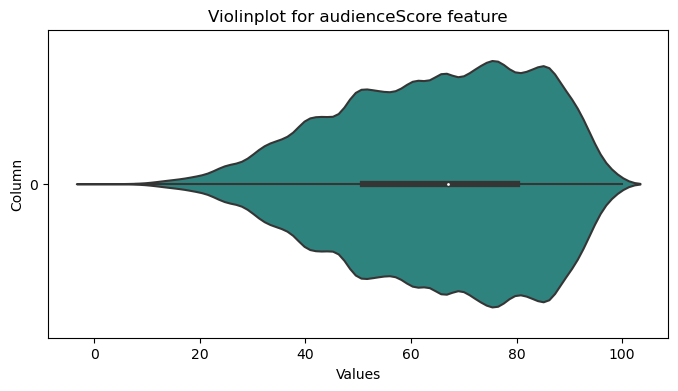

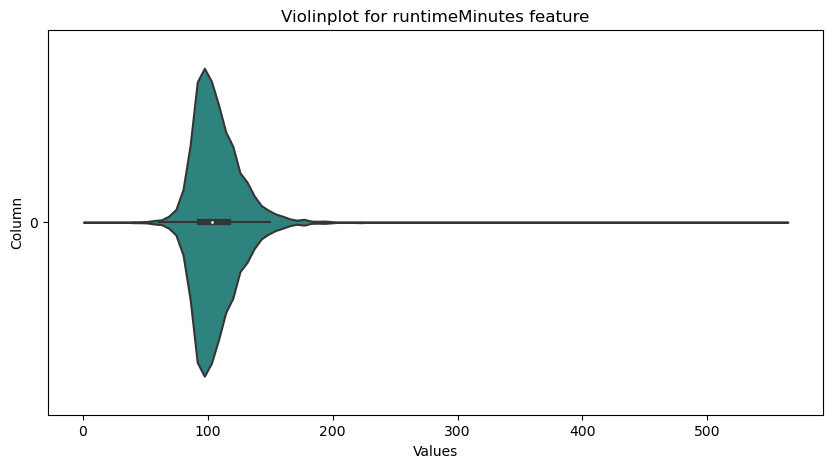

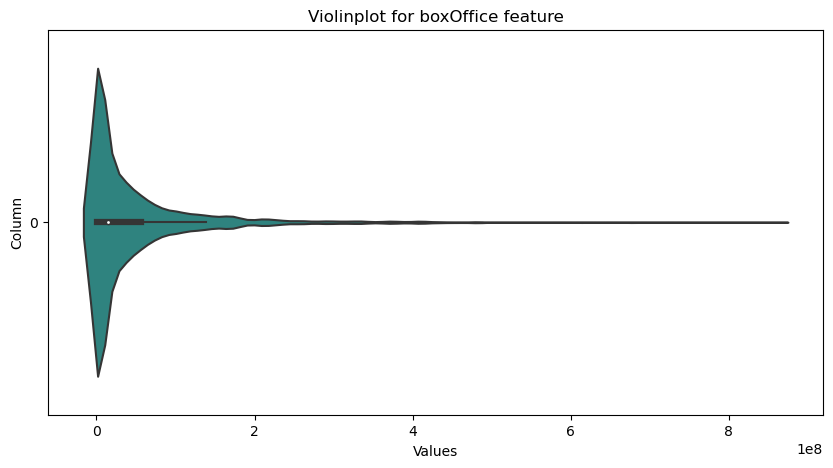

In [41]:
plt.figure(figsize=(8, 4))
for col in num_cols:
    sns.violinplot(data= X[col], orient='horizontal', palette= 'viridis')
    plt.title("Violinplot for " + col + " feature")
    plt.xlabel('Values')
    plt.ylabel('Column')
    plt.show()

### **Preprocessing**

In [42]:
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,LabelEncoder,FunctionTransformer, OneHotEncoder,MultiLabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import f_classif, chi2,mutual_info_classif, SelectFromModel
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.dummy import DummyClassifier


from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

import ast

Segregate Numerical and Categorical Columns

In [43]:
cols = ['genre','originalLanguage','director','distributor']

def set_to_str(val):
    if isinstance(val, set):
        return ','.join(val)
    return val

for col in cols:
    train_after_drop[col] = train_after_drop[col].map(set_to_str)
    test_after_drop[col] = test_after_drop[col].map(set_to_str)

In [44]:
cat_cols = test_after_drop.select_dtypes(include = "object").columns.to_list()
num_cols = test_after_drop.select_dtypes(include = "float64").columns.to_list()

print('Numerical Columns : ',num_cols)
print('Categorical Columns : ',cat_cols)

Numerical Columns :  ['audienceScore', 'runtimeMinutes', 'boxOffice']
Categorical Columns :  ['genre', 'originalLanguage', 'director', 'distributor', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'releaseDate']


In [45]:
X = train_after_drop.drop('sentiment',axis=1).copy()
y = train_after_drop['sentiment'].copy()

In [46]:
# Define the categorical columns and their corresponding imputer fill values
cat_fill_values = {
    'genre': 'noGenre',
    'originalLanguage': 'nolanguage',
    'director': 'nodirector',
    'distributor': 'nodistributor',
    'reviewerName': 'noReviewname',
    'isFrequentReviewer': 'noFreqReview',
    'releaseDate': 'notreleased',
    'reviewText': 'noReview'
}

# Function to create a categorical column pipeline
def create_cat_pipe(column_name, fill_value):
    return Pipeline([
        ('select', ColumnTransformer([('pass', 'passthrough', [column_name])])),
        ('text_si', SimpleImputer(strategy='constant', fill_value=fill_value)),
        ('text_to_list', FunctionTransformer(lambda x: x.ravel().tolist(), validate=False)),
        ('text_vector', TfidfVectorizer())
    ])

# Create pipelines for categorical columns using a dictionary comprehension
cat_pipes = {col: create_cat_pipe(col, fill_value) for col, fill_value in cat_fill_values.items()}

num_col_pipe = Pipeline([
    ('select',ColumnTransformer([('pass','passthrough',num_cols)])),
    ('si',SimpleImputer(strategy='mean')),
    ('mm',MinMaxScaler())])

# Combine all pipelines
pre_processing_pipe = FeatureUnion(transformer_list=[
    ('num', num_col_pipe),
#     ('reviewText', cat_review_pipe),
    *[(col, cat_pipes[col]) for col in cat_cols]
])

In [47]:
from sklearn import set_config
set_config(display= 'diagram')

# displays HTML representation 
pre_processing_pipe

FeatureUnion(transformer_list=[('num',
                                Pipeline(steps=[('select',
                                                 ColumnTransformer(transformers=[('pass',
                                                                                  'passthrough',
                                                                                  ['audienceScore',
                                                                                   'runtimeMinutes',
                                                                                   'boxOffice'])])),
                                                ('si', SimpleImputer()),
                                                ('mm', MinMaxScaler())])),
                               ('genre',
                                Pipeline(steps=[('select',
                                                 ColumnTransformer(transformers=[('pass',
                                                                                  'passthrough',
                                                                                  ['genre'])])),
                                                ('text_si',
                                                 SimpleImputer(fill_...
                                                 TfidfVectorizer())])),
                               ('releaseDate',
                                Pipeline(steps=[('select',
                                                 ColumnTransformer(transformers=[('pass',
                                                                                  'passthrough',
                                                                                  ['releaseDate'])])),
                                                ('text_si',
                                                 SimpleImputer(fill_value='notreleased',
                                                               strategy='constant')),
                                                ('text_to_list',
                                                 FunctionTransformer(func=<function create_cat_pipe.<locals>.<lambda> at 0x786b1c7c56c0>)),
                                                ('text_vector',
                                                 TfidfVectorizer())]))])

**MODELS**

In [48]:
def make_full_pipeline(classifier, preprocessor, feature_selection):
#     here we are making a final pipeline by combinig 
#     preprocessing and 
#     feature selection and 
#     model
    
    if feature_selection:
        full_pipe= Pipeline([('pre_processing', preprocessor),
                        ('feat_selection',SelectFromModel(estimator = classifier)),
                        ('clf', classifier )])
    else:
        full_pipe= Pipeline([('pre_processing', preprocessor),
                        ('clf', classifier )])
    return full_pipe

def train_model(classifier, preprocessor, X, y,feature_selection):
#     here we are traing the model and checking perfomance of maodel
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size= 0.3,
                                                       random_state= 0)
    
    full_pipe= make_full_pipeline(classifier, preprocessor,feature_selection)
    full_pipe.fit(X_train, y_train)
    
    print("-------------------Metrics on training set --------------------------")
    y_train_pred = full_pipe.predict(X_train)
    print("f1 micro score on training set: ", f1_score(y_train, y_train_pred, average='micro'),"\n")
    print(classification_report(y_train, y_train_pred),"\n")

    
    print("-------------------Metrics on test set --------------------------")
    y_test_pred = full_pipe.predict(X_test)
    print("F1 score on test set: " ,f1_score(y_test, y_test_pred, average='micro'))
    print()
    print(classification_report(y_test, y_test_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    
    return ""

***Dummy Classifier***

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.6682261037479154 

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00     37799
    POSITIVE       0.67      1.00      0.80     76131

    accuracy                           0.67    113930
   macro avg       0.33      0.50      0.40    113930
weighted avg       0.45      0.67      0.54    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.6682641107561236

              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00     16198
    POSITIVE       0.67      1.00      0.80     32630

    accuracy                           0.67     48828
   macro avg       0.33      0.50      0.40     48828
weighted avg       0.45      0.67      0.54     48828



''

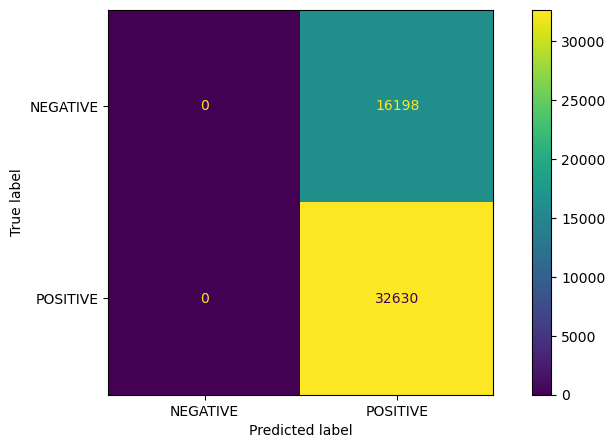

In [49]:
dummy_class = DummyClassifier(random_state=0)
train_model(dummy_class,pre_processing_pipe,X,y, feature_selection = False)

**Logistic Regression Model**

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.8720179057315895 

              precision    recall  f1-score   support

    NEGATIVE       0.85      0.75      0.79     37799
    POSITIVE       0.88      0.94      0.91     76131

    accuracy                           0.87    113930
   macro avg       0.87      0.84      0.85    113930
weighted avg       0.87      0.87      0.87    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.8250184320471861

              precision    recall  f1-score   support

    NEGATIVE       0.77      0.67      0.72     16198
    POSITIVE       0.85      0.90      0.87     32630

    accuracy                           0.83     48828
   macro avg       0.81      0.79      0.80     48828
weighted avg       0.82      0.83      0.82     48828



''

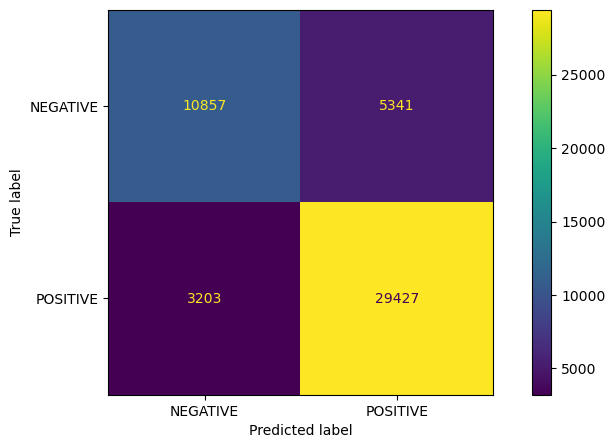

In [50]:
log_reg_class = LogisticRegression(random_state=0,solver='saga')
train_model(log_reg_class,pre_processing_pipe,X,y,feature_selection=True)

**Linear SVM**

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.9326779601509699 

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.88      0.90     37799
    POSITIVE       0.94      0.96      0.95     76131

    accuracy                           0.93    113930
   macro avg       0.93      0.92      0.92    113930
weighted avg       0.93      0.93      0.93    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.8173179323339068

              precision    recall  f1-score   support

    NEGATIVE       0.74      0.69      0.72     16198
    POSITIVE       0.85      0.88      0.87     32630

    accuracy                           0.82     48828
   macro avg       0.80      0.79      0.79     48828
weighted avg       0.82      0.82      0.82     48828



''

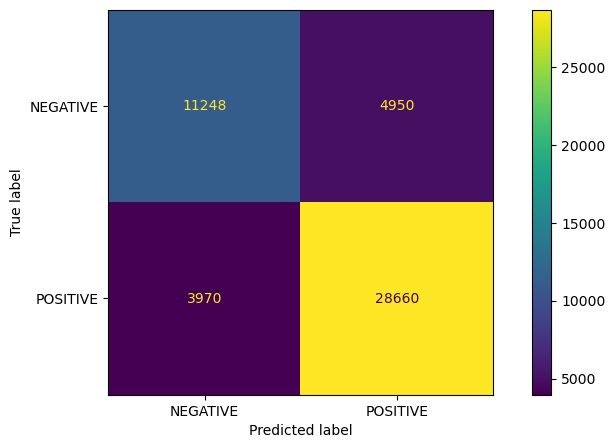

In [51]:
lin_svm =  LinearSVC(random_state=0)
train_model(lin_svm,pre_processing_pipe,X,y,feature_selection=False)

---------------Linear Svm tuned----------------

In [52]:
# lin_svc = LinearSVC(random_state=0,penalty='l2', loss='hinge',dual=True)
# lin_svc_params = {
#     'max_iter' : [2000,2500,3000],
# }

# X_trans = pre_processing_pipe.fit_transform(X)


# grid_lin_svc = GridSearchCV(lin_svc, lin_svc_params, cv=5)
# grid_lin_svc.fit(X_trans,y)

In [53]:
# grid_lin_svc.best_params_

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.9018344597559905 

              precision    recall  f1-score   support

    NEGATIVE       0.88      0.81      0.85     37799
    POSITIVE       0.91      0.95      0.93     76131

    accuracy                           0.90    113930
   macro avg       0.90      0.88      0.89    113930
weighted avg       0.90      0.90      0.90    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.8231957073810109

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.69      0.72     16198
    POSITIVE       0.85      0.89      0.87     32630

    accuracy                           0.82     48828
   macro avg       0.80      0.79      0.80     48828
weighted avg       0.82      0.82      0.82     48828



''

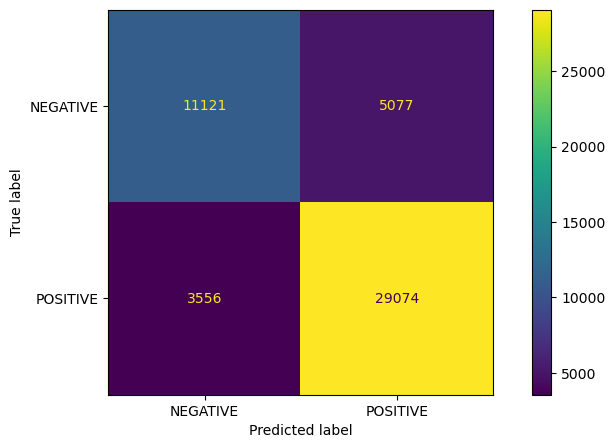

In [54]:
best_lin_svm =  LinearSVC(random_state=0,penalty='l2', loss='hinge',dual=True, max_iter=2500)
train_model(best_lin_svm,pre_processing_pipe,X,y,feature_selection=False)

**SGD Classifier**

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.8347055209339068 

              precision    recall  f1-score   support

    NEGATIVE       0.82      0.64      0.72     37799
    POSITIVE       0.84      0.93      0.88     76131

    accuracy                           0.83    113930
   macro avg       0.83      0.79      0.80    113930
weighted avg       0.83      0.83      0.83    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.8100065536167773

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.60      0.68     16198
    POSITIVE       0.82      0.91      0.87     32630

    accuracy                           0.81     48828
   macro avg       0.80      0.76      0.77     48828
weighted avg       0.81      0.81      0.80     48828



''

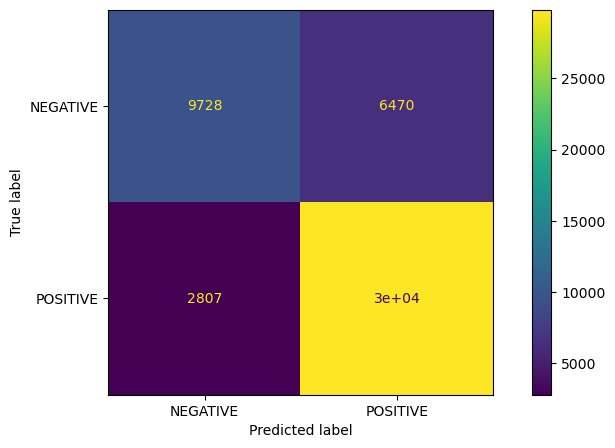

In [55]:
sgd = SGDClassifier(random_state=0)
train_model(sgd,pre_processing_pipe,X,y,feature_selection=True)

-------------- SGD Classifier tuned ------------

In [56]:
# sgd = SGDClassifier(random_state=0, 
#                          learning_rate = 'optimal',
#                          penalty = 'l2',
#                          warm_start = True)
# sgd_params = {
#     'alpha' : [0.1,0.001,0.0001], 
#     'max_iter' : [500,1000],
#     'loss': ('modified_huber','log','hinge','perceptron'), 
# }

# X_trans = pre_processing_pipe.fit_transform(X)


# grid_sgd = GridSearchCV(sgd, sgd_params, cv=5)
# grid_sgd.fit(X_trans,y)

In [57]:
# grid_sgd.best_params_

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.8717809181076099 

              precision    recall  f1-score   support

    NEGATIVE       0.84      0.76      0.80     37799
    POSITIVE       0.89      0.93      0.91     76131

    accuracy                           0.87    113930
   macro avg       0.86      0.84      0.85    113930
weighted avg       0.87      0.87      0.87    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.8248545916277545

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.69      0.72     16198
    POSITIVE       0.85      0.89      0.87     32630

    accuracy                           0.82     48828
   macro avg       0.81      0.79      0.80     48828
weighted avg       0.82      0.82      0.82     48828



''

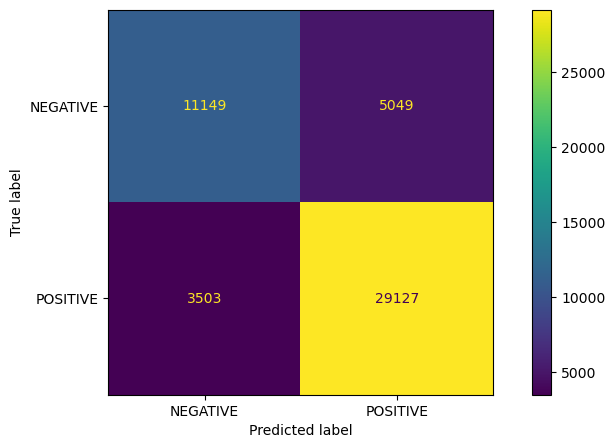

In [58]:
sgd_best = SGDClassifier(random_state=0, 
                         learning_rate = 'optimal',
                         penalty = 'l2',
                         warm_start = True,
                         alpha= 0.0001,
                         loss='modified_huber',
                         max_iter=1000)
train_model(sgd_best,pre_processing_pipe,X,y,feature_selection=True)

**MultinomialNB Classifier**

-------------------Metrics on training set --------------------------
f1 micro score on training set:  0.8110945317300097 

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.61      0.68     37799
    POSITIVE       0.82      0.91      0.87     76131

    accuracy                           0.81    113930
   macro avg       0.80      0.76      0.77    113930
weighted avg       0.81      0.81      0.80    113930
 

-------------------Metrics on test set --------------------------
F1 score on test set:  0.7750061440157286

              precision    recall  f1-score   support

    NEGATIVE       0.72      0.53      0.61     16198
    POSITIVE       0.79      0.89      0.84     32630

    accuracy                           0.78     48828
   macro avg       0.76      0.71      0.73     48828
weighted avg       0.77      0.78      0.77     48828



''

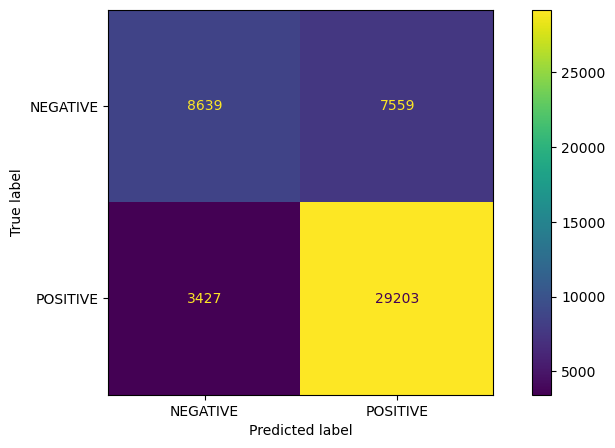

In [59]:
multi_nb = MultinomialNB()
train_model(multi_nb,pre_processing_pipe,X,y,feature_selection=False)

## Model Comparison

|         Model        |  Train Score  |  Test Score  |
|----------------------|---------------|--------------|
|   Dummy Classifier   |     0.668     |     0.668    |
|  Logistic Regression |     0.868     |     0.825    |
|      Linear SVM      |     0.902     |     0.823    |
|     SGDClassifier    |     0.872     |     0.825    |
|     MultinomialNB    |     0.811     |     0.775    |

### Best Model
Logistic Regression, Linear SVM and SGDClassifier are 3 models doing well but least diffrence between train and test is for Logistic we are going with that.

-------------------------------------------Logistic Regression Submission--------------------------------------

In [60]:
train_trans = pre_processing_pipe.fit_transform(X,y)
test_trans = pre_processing_pipe.transform(test_after_drop)
lr = LogisticRegression(solver='saga',random_state=0)

selector = SelectFromModel(estimator=lr).fit(train_trans,y)
# selector.get_support().sum()
select_train_trans = selector.transform(train_trans)
select_test_trans = selector.transform(test_trans)

lr.fit(select_train_trans,y)
# select_train_trans.shape, select_test_trans.shape

LogisticRegression(random_state=0, solver='saga')

In [61]:
y_pred = lr.predict(select_train_trans)
f1_score(y, y_pred, average='micro')

0.8692475945882845

In [62]:
sub = pd.DataFrame(lr.predict(select_test_trans), columns=['sentiment'])
sub.index.name = 'id'
sub = sub.reset_index()
sub.to_csv("submission.csv", encoding='utf-8', index=False)
# output = pd.read_csv("submission.csv")